Enlace de del desarroyo mostrado en este cuaderno:      <a href="https://colab.research.google.com/github/JCardenas05/Teoria_Se-ales/blob/main/Taller_Final/Book_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab This NoteBook"/></a>

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
def load_data(path='Sonar.csv'):
    df = pd.read_csv(path)
    x = df.drop('Class', axis=1).to_numpy()
    y = df['Class']
    print(f'Load data shapes:\n x:{x.shape}\n y:{y.shape}')
    return x,y


def plt_cofusion_matrix(message_org, message_predict):
    conf_matrix = confusion_matrix(message_org, message_predict)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()

Load data shapes:
 x:(208, 60)
 y:(208,)
Shape X StandarScaler(208, 60)
(205, 3, 60)
60
Epoch 1/60
6/6 [==============================] - 2s 56ms/step - loss: 0.7804 - accuracy: 0.5915 - val_loss: 0.7121 - val_accuracy: 0.6341
Epoch 2/60
6/6 [==============================] - 0s 11ms/step - loss: 0.6126 - accuracy: 0.6646 - val_loss: 0.5982 - val_accuracy: 0.7073
Epoch 3/60
6/6 [==============================] - 0s 10ms/step - loss: 0.5086 - accuracy: 0.7439 - val_loss: 0.5169 - val_accuracy: 0.7317
Epoch 4/60
6/6 [==============================] - 0s 10ms/step - loss: 0.4323 - accuracy: 0.8049 - val_loss: 0.4583 - val_accuracy: 0.7805
Epoch 5/60
6/6 [==============================] - 0s 9ms/step - loss: 0.3712 - accuracy: 0.8232 - val_loss: 0.4076 - val_accuracy: 0.8049
Epoch 6/60
6/6 [==============================] - 0s 10ms/step - loss: 0.3224 - accuracy: 0.8659 - val_loss: 0.3720 - val_accuracy: 0.8293
Epoch 7/60
6/6 [==============================] - 0s 10ms/step - loss: 0.2850 -

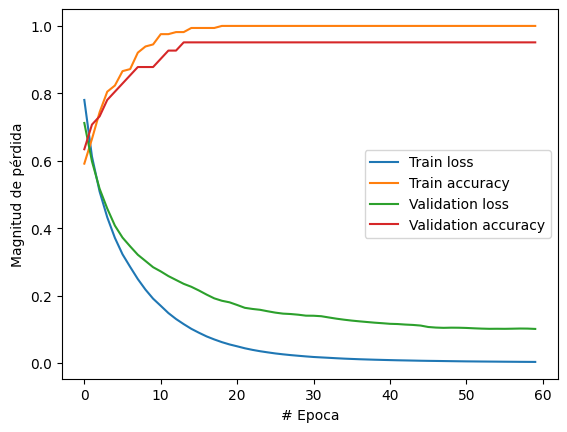

Confusion Matrix:
[[21  2]
 [ 0 18]]
41


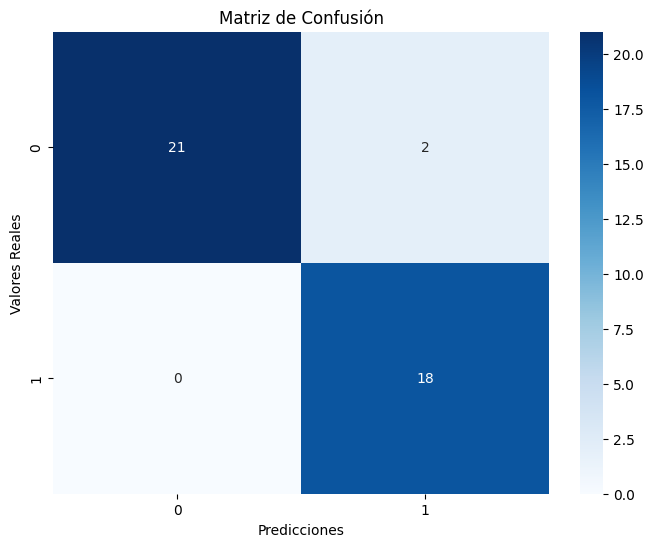

In [67]:
# Reshape X for RNN input (assuming 3D input with samples, time steps, and features)
# You can adjust 'n_steps' based on your sequence length
# Standardize features
X,y = load_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Shape X StandarScaler{X.shape}')

n_steps = 3
X = np.array([X[i:i + n_steps] for i in range(len(X) - n_steps)])
y = y[n_steps:]

print(X.shape)
print(X.shape[2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_metrics=model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history_metrics.history["loss"], label='Train loss')
plt.plot(history_metrics.history["accuracy"], label = 'Train accuracy')

plt.plot(history_metrics.history["val_loss"], label = 'Validation loss' )
plt.plot(history_metrics.history["val_accuracy"], label = 'Validation accuracy' )
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(sum(sum(conf_matrix)))

plt_cofusion_matrix(y_test,y_pred)

    

RNN + LSTM

Load data shapes:
 x:(208, 60)
 y:(208,)
Shape X StandarScaler(208, 60)
(205, 3, 60)
60
Epoch 1/60
6/6 [==============================] - 2s 59ms/step - loss: 0.6450 - accuracy: 0.6341 - val_loss: 0.5793 - val_accuracy: 0.7561
Epoch 2/60
6/6 [==============================] - 0s 11ms/step - loss: 0.5561 - accuracy: 0.7866 - val_loss: 0.5109 - val_accuracy: 0.8049
Epoch 3/60
6/6 [==============================] - 0s 10ms/step - loss: 0.4824 - accuracy: 0.8171 - val_loss: 0.4616 - val_accuracy: 0.8293
Epoch 4/60
6/6 [==============================] - 0s 10ms/step - loss: 0.4217 - accuracy: 0.8537 - val_loss: 0.4147 - val_accuracy: 0.8293
Epoch 5/60
6/6 [==============================] - 0s 10ms/step - loss: 0.3656 - accuracy: 0.8902 - val_loss: 0.3733 - val_accuracy: 0.8293
Epoch 6/60
6/6 [==============================] - 0s 17ms/step - loss: 0.3141 - accuracy: 0.9085 - val_loss: 0.3351 - val_accuracy: 0.8537
Epoch 7/60
6/6 [==============================] - 0s 11ms/step - loss: 0.2643 

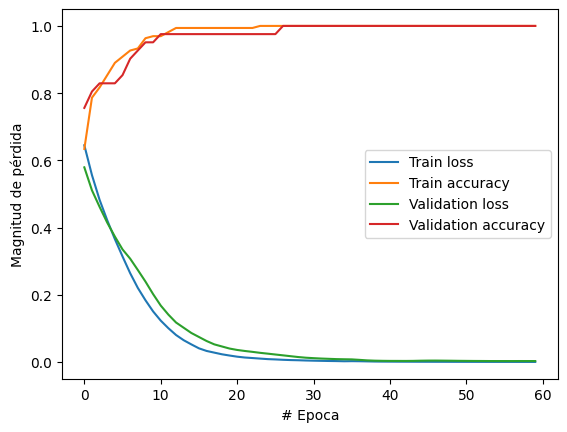

Confusion Matrix:
[[23  0]
 [ 0 18]]
41


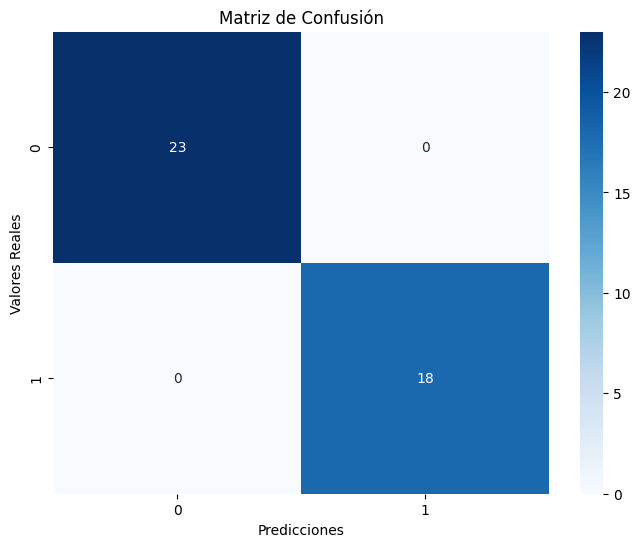

In [71]:
# Separate features (X) and target variable (y)
from tensorflow.keras.layers import LSTM, Dense
X,y = load_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Shape X StandarScaler{X.shape}')

n_steps = 3
X = np.array([X[i:i + n_steps] for i in range(len(X) - n_steps)])
y = y[n_steps:]

print(X.shape)
print(X.shape[2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_metrics=model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history_metrics.history["loss"], label='Train loss')
plt.plot(history_metrics.history["accuracy"], label = 'Train accuracy')

plt.plot(history_metrics.history["val_loss"], label = 'Validation loss' )
plt.plot(history_metrics.history["val_accuracy"], label = 'Validation accuracy' )
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(sum(sum(conf_matrix)))

plt_cofusion_matrix(y_test,y_pred)

Load data shapes:
 x:(208, 60)
 y:(208,)
Shape X StandarScaler(208, 60)
(208, 60)
Epoch 1/100
6/6 [==============================] - 1s 50ms/step - loss: 1.2088 - val_loss: 1.3925
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 1.2013 - val_loss: 1.3838
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 1.1919 - val_loss: 1.3713
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 1.1776 - val_loss: 1.3530
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 1.1562 - val_loss: 1.3267
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 1.1281 - val_loss: 1.2924
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 1.0884 - val_loss: 1.2526
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 1.0433 - val_loss: 1.2083
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.9954 - val_loss: 1.1693
Epoch 10/100
6/6 [=======================

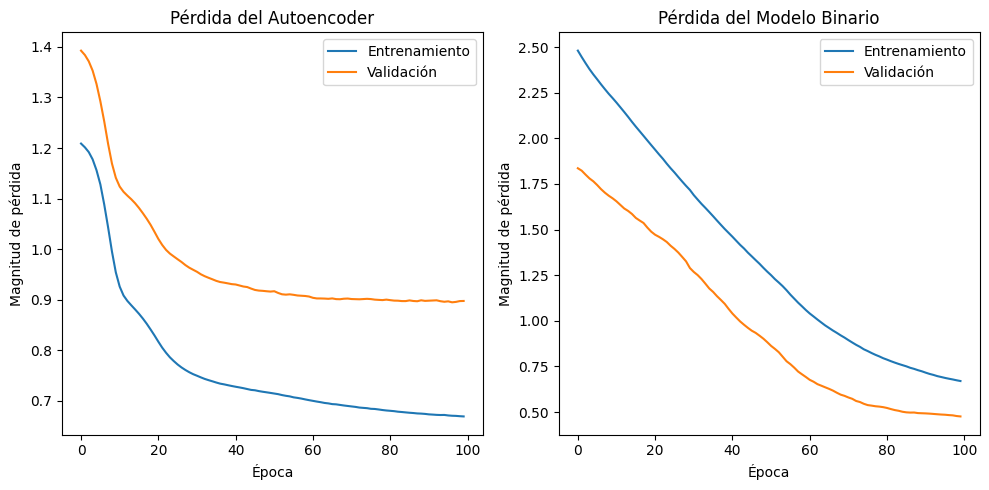

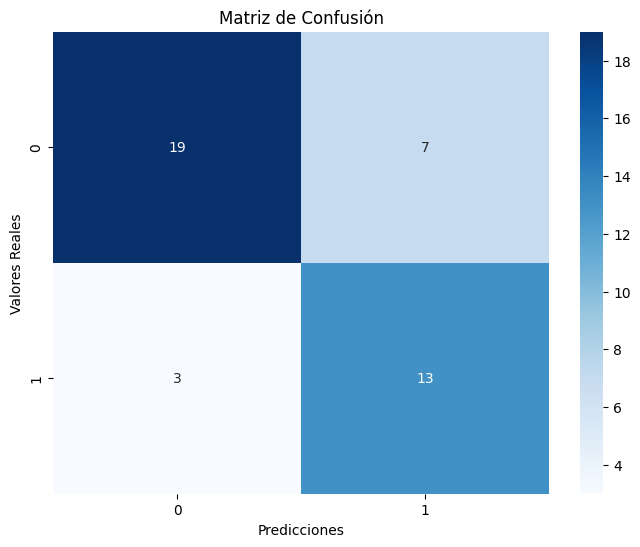

In [86]:
X,y = load_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Shape X StandarScaler{X.shape}')

print(X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history_autoencoder=autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

# Extract encoder part for feature extraction
encoder = Sequential(autoencoder.layers[:3])  # Adjust based on the number of layers you want to use for encoding

# Freeze the layers in the encoder during fine-tuning
for layer in encoder.layers:
    layer.trainable = False

# Create a binary classification model by adding a dense layer on top of the encoder
binary_model = Sequential([
    encoder,
    Dense(1, activation='sigmoid')
])

# Compile the binary classification model
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model on the binary classification task
history_binary=binary_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred_probs = binary_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


# Visualizar la pérdida del autoencoder
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_autoencoder.history["loss"], label='Entrenamiento')
plt.plot(history_autoencoder.history["val_loss"], label='Validación')
plt.title('Pérdida del Autoencoder')
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.legend()

# Visualizar la pérdida del modelo binario
plt.subplot(1, 2, 2)
plt.plot(history_binary.history["loss"], label='Entrenamiento')
plt.plot(history_binary.history["val_loss"], label='Validación')
plt.title('Pérdida del Modelo Binario')
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.legend()

plt.tight_layout()
plt.show()


plt_cofusion_matrix(y_test,y_pred)



binary classification using an autoencoder with a dedicated classifier on top, you can follow a semi-supervised approach. Here’s an example using TensorFlow and Keras:

Load data shapes:
 x:(208, 60)
 y:(208,)
Shape X StandarScaler (208, 60)
Epoch 1/100
6/6 [==============================] - 1s 58ms/step - loss: 1.2088 - val_loss: 1.3901
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1.1971 - val_loss: 1.3786
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1824 - val_loss: 1.3631
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 1.1625 - val_loss: 1.3408
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 1.1349 - val_loss: 1.3105
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 1.0978 - val_loss: 1.2739
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 1.0560 - val_loss: 1.2342
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 1.0135 - val_loss: 1.1979
Epoch 9/100
6/6 [==============================] - 0s 10ms/step - loss: 0.9761 - val_loss: 1.1694
Epoch 10/100
6/6 [============================

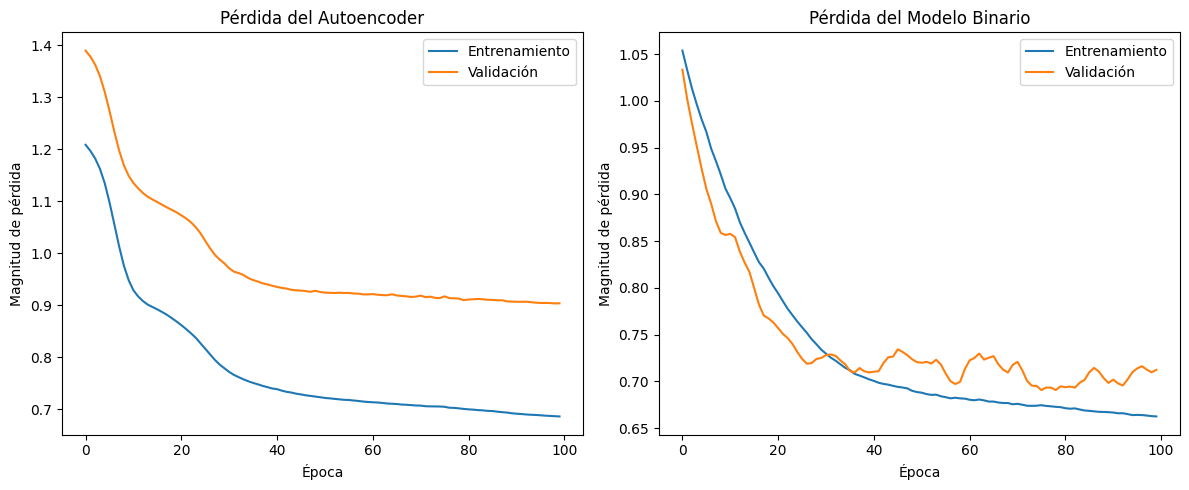

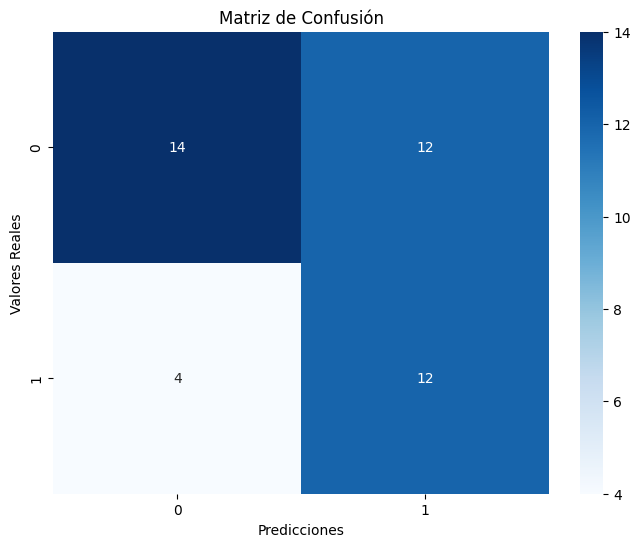

In [90]:
# Preprocesamiento de datos
X, y = load_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'Shape X StandarScaler {X.shape}')

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Autoencoder
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

# Compilar el modelo del autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el autoencoder y mostrar la pérdida a lo largo del tiempo
history_autoencoder = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

# Extraer el codificador para la extracción de características
encoder = Sequential(autoencoder.layers[:3])  # Ajustar según el número de capas que desees usar para la codificación

# Congelar las capas del codificador durante el ajuste fino
for layer in encoder.layers:
    layer.trainable = False

# Modelo de clasificación binaria
binary_model = Sequential([
    encoder,
    Dense(1, activation='sigmoid')
])

# Compilar el modelo de clasificación binaria
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ajuste fino del modelo en la tarea de clasificación binaria
history_binary = binary_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Hacer predicciones
y_pred_probs = binary_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Visualizar la pérdida del autoencoder y del modelo binario
plt.figure(figsize=(12, 5))

# Pérdida del autoencoder
plt.subplot(1, 2, 1)
plt.plot(history_autoencoder.history["loss"], label='Entrenamiento')
plt.plot(history_autoencoder.history["val_loss"], label='Validación')
plt.title('Pérdida del Autoencoder')
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.legend()

# Pérdida del modelo binario
plt.subplot(1, 2, 2)
plt.plot(history_binary.history["loss"], label='Entrenamiento')
plt.plot(history_binary.history["val_loss"], label='Validación')
plt.title('Pérdida del Modelo Binario')
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.legend()

plt.tight_layout()
plt.show()


plt_cofusion_matrix(y_test,y_pred)